<a href="https://colab.research.google.com/github/josvaal/Keras-CCN/blob/main/Convolutional_Neural_Network_With_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports

## Sequential

Is a Keras class for building neural networks by stacking layers sequentially. It simplifies model creation with methods like add(), compile(), and fit().

## Datasets

Provide a few toy datasets (already-vectorized, in Numpy format) that can be used for debugging a model or creating simple code examples.

## Layers

- **Dense**: creates a fully connected layer where each input connects to every output neuron. It learns patterns using weights and an activation function. Key parameters are units (number of neurons) and activation (activation function).

- **Flatten**: is a Keras layer that converts multi-dimensional inputs into a one-dimensional array. It’s often used to flatten the output of convolutional layers before feeding it into fully connected layers.

- **Conv2D**: applies 2D convolutional filters to input data, extracting features. Key parameters are filters (number of filters) and kernel_size (filter size).

- **MaxPooling2D**: reduces the size of 2D data by selecting the maximum value in small regions, preserving key features while lowering computational cost.

## Numpy

A library for efficient array and matrix operations, using np as a shorthand alias.

## Pyplot

 Module from the Matplotlib library, which is used for creating plots, charts, and graphs in Python.

 ## OS

 Provides functions for interacting with the operating system, such as file and directory management.

In [1]:
from tensorflow.keras import Sequential, datasets
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
import numpy as np
from matplotlib import pyplot as plt
import os

`datasets.cifar10.load_data()` is a function in TensorFlow/Keras that loads the CIFAR-10 dataset, a collection of 60,000 32x32 color images in 10 different classes (e.g., airplanes, cars, birds). The function returns two tuples: one for the training set and one for the test set, each containing images and their corresponding labels.

- The ouput of the print statements will be (50000, 32, 32, 3). This basically means, we are going to use **50000 images(rows of data)** for testing and each image is 32X32 pixels and 3 dimensions, the RGB scale.

- The second print statement will be **(10000, 32, 32, 3).** This is 10000 images of 32X32 pixel image and 3 dimensions. This is the sample we are going to use for testing the model.

In [2]:
(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()
# take a look at the shape of the dataset
print(X_train.shape)
print(X_test.shape)

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step
(50000, 32, 32, 3)
(10000, 32, 32, 3)


`y_train = y_train.reshape(-1,)` reshapes the `y_train` array into a 1D vector. The `-1` argument automatically adjusts the size based on the total number of elements, flattening the array while keeping its original length. This is commonly used to ensure the labels are in a 1D format for machine learning models.

In [4]:
y_train = y_train.reshape(-1,)
y_train

array([6, 9, 9, ..., 9, 1, 1], dtype=uint8)

`y_classes = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]` defines a list of class names corresponding to the 10 categories in the CIFAR-10 dataset. Each entry in the list represents a label for the dataset images.

In [5]:
y_classes = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

The **showImage** function displays an image from a dataset and labels it with its class name. For example, `showImage(X_train, y_train, 6)` shows the **7th image** in `X_train` with its corresponding label.

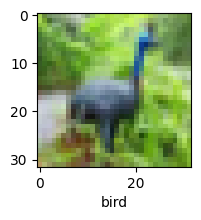

In [18]:
def showImage(X, y, index):
    plt.figure(figsize=(15, 2))
    plt.imshow(X[index])
    plt.xlabel(y_classes[y[index]])

showImage(X_train, y_train, 6)

This code prints the first image from `X_train` before and after normalization. Normalization is done by dividing pixel values by 255, scaling them to a range between 0 and 1. The `print` statements show the pixel values of the first image in `X_train` before and after this scaling.

In [13]:
# before normalization
print(X_train[0])

X_train = X_train/255
X_test = X_test/255

# after normalization
print(X_train[0])

[[[ 59  62  63]
  [ 43  46  45]
  [ 50  48  43]
  ...
  [158 132 108]
  [152 125 102]
  [148 124 103]]

 [[ 16  20  20]
  [  0   0   0]
  [ 18   8   0]
  ...
  [123  88  55]
  [119  83  50]
  [122  87  57]]

 [[ 25  24  21]
  [ 16   7   0]
  [ 49  27   8]
  ...
  [118  84  50]
  [120  84  50]
  [109  73  42]]

 ...

 [[208 170  96]
  [201 153  34]
  [198 161  26]
  ...
  [160 133  70]
  [ 56  31   7]
  [ 53  34  20]]

 [[180 139  96]
  [173 123  42]
  [186 144  30]
  ...
  [184 148  94]
  [ 97  62  34]
  [ 83  53  34]]

 [[177 144 116]
  [168 129  94]
  [179 142  87]
  ...
  [216 184 140]
  [151 118  84]
  [123  92  72]]]
[[[0.23137255 0.24313725 0.24705882]
  [0.16862745 0.18039216 0.17647059]
  [0.19607843 0.18823529 0.16862745]
  ...
  [0.61960784 0.51764706 0.42352941]
  [0.59607843 0.49019608 0.4       ]
  [0.58039216 0.48627451 0.40392157]]

 [[0.0627451  0.07843137 0.07843137]
  [0.         0.         0.        ]
  [0.07058824 0.03137255 0.        ]
  ...
  [0.48235294 0.3450980

Convolutional Neural Network (CNN) using TensorFlow's Keras API with the following layers:

1. **`Conv2D`**: Applies a 2D convolution with 32 filters and a 3x3 kernel, using ReLU activation.
2. **`MaxPooling2D`**: Performs max pooling with a 2x2 pool size, reducing the spatial dimensions.
3. **`Conv2D`**: Adds another convolutional layer with 64 filters and a 4x4 kernel, also using ReLU activation.
4. **`MaxPooling2D`**: Another max pooling layer with a 2x2 pool size.
5. **`Flatten`**: Flattens the 2D feature maps into a 1D vector.
6. **`Dense`**: Fully connected layer with 34 units and ReLU activation.
7. **`Dense`**: Final output layer with 10 units and softmax activation for classification.

`model.summary()` prints a summary of the model's architecture, including the number of parameters and the shape of each layer.

In [14]:
model = Sequential()

model.add(Conv2D(filters = 32, kernel_size=(3, 3), activation="relu", input_shape=(32, 32, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(4, 4), activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(units = 34, activation="relu"))
model.add(Dense(units=10, activation="softmax"))

model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 12, 12, 64)          │          32,832 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2304)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 34)                  │          78,370 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             350 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 112,448 (439.25 KB)

 Trainable params: 112,448 (439.25 KB)

 Non-trainable params: 0 (0.00 B)

- **`optimizer="adam"`**: Uses the Adam optimizer, which adjusts learning rates based on training progress.
- **`loss="sparse_categorical_crossentropy"`**: Specifies the loss function for multi-class classification where labels are integers.
- **`metrics=["accuracy"]`**: Tracks accuracy as the evaluation metric during training and testing.

These settings are essential for compiling the model before training it with the `.fit()` method.

In [15]:
model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

trains the model with the following parameters:

- **`X_train`** and **`y_train`**: Training data and labels.
- **`validation_data=(X_test, y_test)`**: Provides validation data to evaluate the model's performance on unseen data after each epoch.
- **`epochs=5`**: Specifies the number of times the model will iterate over the entire training dataset.

The model will be trained for 5 epochs, with validation performed using `X_test` and `y_test` to monitor performance and adjust if necessary.

In [16]:
model.fit(X_train, y_train, validation_data = (X_test, y_test), epochs = 5)

Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 79s 50ms/step - accuracy: 0.3160 - loss: 1.8368 - val_accuracy: 0.5385 - val_loss: 1.2656
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 78s 50ms/step - accuracy: 0.5632 - loss: 1.2222 - val_accuracy: 0.6065 - val_loss: 1.1172
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 76s 49ms/step - accuracy: 0.6216 - loss: 1.0729 - val_accuracy: 0.6189 - val_loss: 1.0675
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 81s 48ms/step - accuracy: 0.6470 - loss: 0.9951 - val_accuracy: 0.6542 - val_loss: 0.9922
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 86s 51ms/step - accuracy: 0.6751 - loss: 0.9282 - val_accuracy: 0.6519 - val_loss: 0.9930


1. **`y_predictions = model.predict(X_test)`**: Uses the trained model to predict probabilities for each class for the test dataset `X_test`.

2. **`print(y_predictions[10])`**: Prints the predicted probabilities for the 10th sample in `X_test`.

3. **`y_predictions = [np.argmax(arr) for arr in y_predictions]`**: Converts the predicted probabilities into class labels by selecting the index of the highest probability for each sample.

4. **`print(y_classes[y_predictions[10]])`**: Prints the class name corresponding to the predicted label of the 10th sample in `X_test`, using the `y_classes` list.

5. **`showImage(X_test, y_predictions, 10)`**: Prints the image in the array

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step
[0.3903577  0.00296351 0.26666188 0.11948492 0.09057231 0.03946741
 0.00233975 0.00439351 0.08176924 0.00198973]
airplane


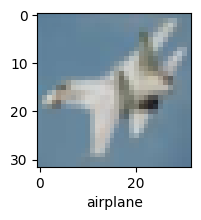

In [21]:
y_predictions = model.predict(X_test)

print(y_predictions[10])

y_predictions = [np.argmax(arr) for arr in y_predictions]

print(y_classes[y_predictions[10]])
showImage(X_test, y_predictions, 10)

`classification_report` from `sklearn.metrics` generates a report showing precision, recall, and F1-score for each class. The code `print(classification_report(y_test, y_predictions))` prints this evaluation for the true labels (`y_test`) against the predicted labels (`y_predictions`).

In [22]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_predictions))

              precision    recall  f1-score   support

           0       0.75      0.67      0.71      1000
           1       0.76      0.82      0.79      1000
           2       0.46      0.60      0.52      1000
           3       0.56      0.38      0.45      1000
           4       0.64      0.50      0.56      1000
           5       0.62      0.47      0.53      1000
           6       0.61      0.82      0.70      1000
           7       0.75      0.67      0.71      1000
           8       0.71      0.81      0.76      1000
           9       0.69      0.77      0.73      1000

    accuracy                           0.65     10000
   macro avg       0.66      0.65      0.65     10000
weighted avg       0.66      0.65      0.65     10000



1. **`confusion_matrix(y_test, y_predictions)`**: Computes the confusion matrix comparing true labels (`y_test`) with predicted labels (`y_predictions`).
2. **`print(cm)`**: Prints the confusion matrix.
3. **`sns.heatmap(cm, annot=True)`**: Plots the confusion matrix using Seaborn with annotations for each cell.
4. **`plt.figure(figsize=(14, 7))`**: Sets the figure size for better readability.
5. **`plt.ylabel("Truth")`, `plt.xlabel("Predictions From Model")`, `plt.title("Confusion matrix")`**: Labels the axes and title of the plot.
6. **`plt.show()`**: Displays the heatmap.

[[672  26  86   9  12   4   9  10 119  53]
 [ 12 825   4   4   3   1   8   2  34 107]
 [ 55  15 604  29  66  54 102  35  26  14]
 [ 20  19 141 381  63 143 129  27  41  36]
 [ 27   5 158  47 500  14 158  62  18  11]
 [ 14   9 149 146  38 468  75  62  24  15]
 [  4  14  61  25  25  16 818   5  17  15]
 [ 12   5  78  26  72  52  22 673   5  55]
 [ 59  43  21   4   5   7   7   4 808  42]
 [ 17 119  10   9   3   1  12  14  45 770]]


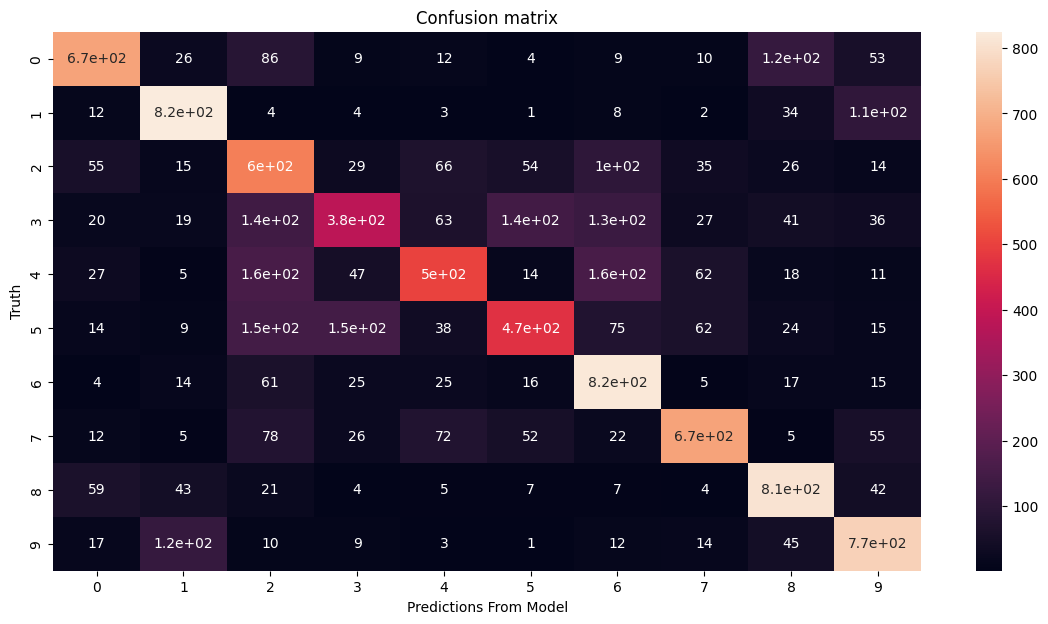

In [23]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_predictions)

print(cm)

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 7))
sns.heatmap(cm, annot=True)
plt.ylabel("Truth")
plt.xlabel("Predictions From Model")
plt.title("Confusion matrix")
plt.show()